# Explore here

In [2]:
# Your code here
import pandas as pd 

dataset = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


DATOS:
- Pregnancies. Número de embarazos del paciente (numérico)
- Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
- BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)
- SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
- Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
- BMI. Índice de masa corporal (numérico)
- DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)
- Age. Edad del paciente (numérico)
- Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

In [3]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
count_zeros = (dataset['Insulin'] == 0).sum()
count_zeros

374

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
dataset = dataset[dataset['Insulin'] > 0]

<Axes: >

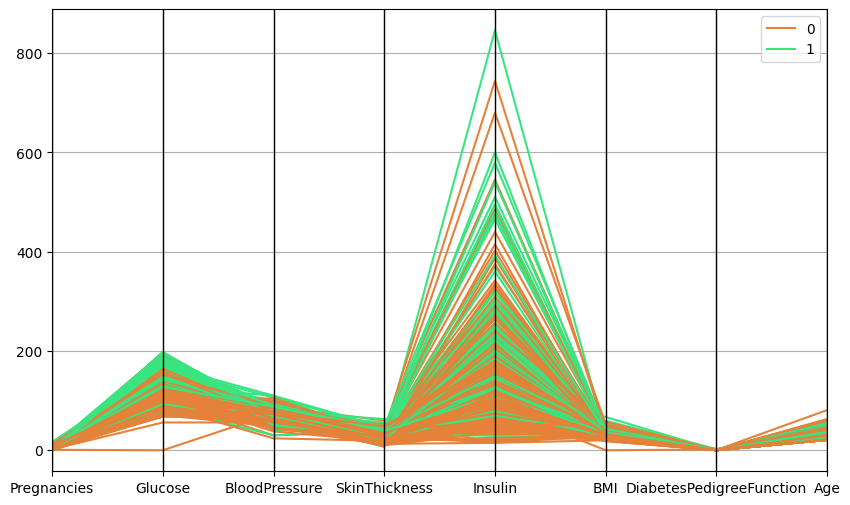

In [16]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

X = dataset.drop('Outcome', axis= 1)
y = dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)


fig, axis = plt.subplots(figsize = (10, 6))
pd.plotting.parallel_coordinates(dataset, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

In [17]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 12)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12)

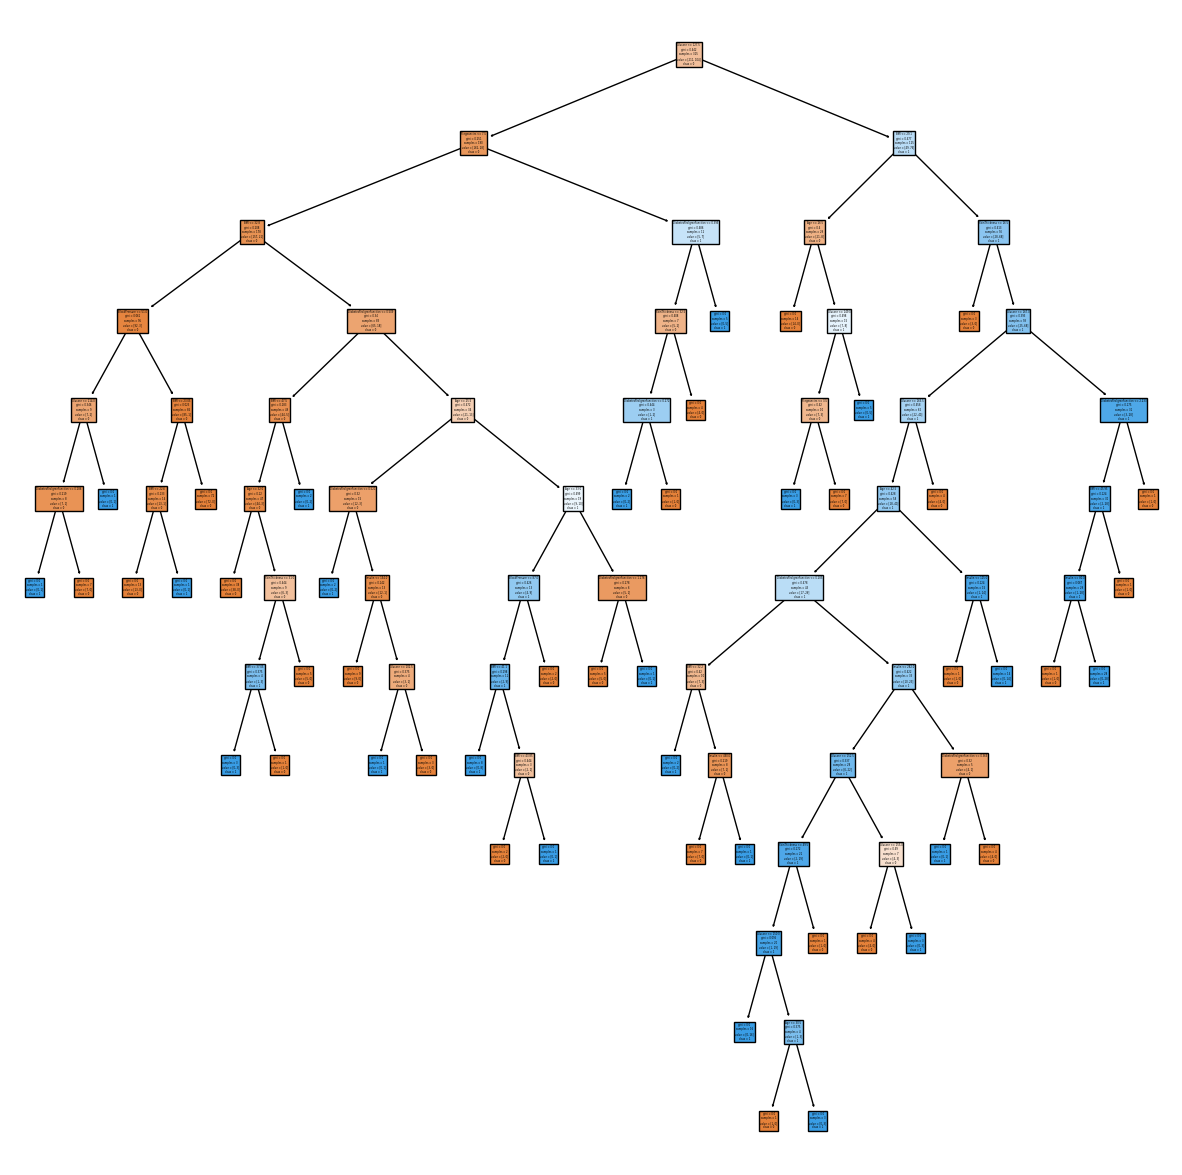

In [18]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [19]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7721518987341772